### 1. Dataset Description  <a id='columns'>

Data

The dataset is based on salary and job postings in India across the internet. The train and the test data consists of attributes mentioned below. The rows of train dataset has rich amount of information regarding the job posting such as name of the designation and key skills required for the job.
The training data and test data comprise of 19802 samples and of 6601 samples each. This is a dataset which has been collected over some time to gather relevant analytics jobs posting over the years.

Features:

-**Name of the company** (Encoded)

-**Years of experience**

Job description

Job designation

Job Type

Key skills

Location

Salary in Rupees Lakhs(To be predicted)

Problem Statement

Based on the given attributes and salary information, build a robust machine learning model that predicts the salary range of the salary post.



In [163]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns
import pandas_profiling

from collections import Counter
%matplotlib inline

In [164]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_mode_interactivity = "all"

In [165]:
ds_input=pd.read_csv(r'Final_Train_Dataset.csv')

In [166]:
#report = pandas_profiling.ProfileReport(ds_input)
#covert profile report as html file
#report.to_file("ds_input.html")


In [167]:
 ds_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 9 columns):
Unnamed: 0              19802 non-null int64
experience              19802 non-null object
job_description         15384 non-null object
job_desig               19802 non-null object
job_type                4797 non-null object
key_skills              19801 non-null object
location                19802 non-null object
salary                  19802 non-null object
company_name_encoded    19802 non-null int64
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [168]:
#dropping job_desription as it seems to be covered by experience and skills.
ds_input.drop(['Unnamed: 0','job_description'],inplace= True,axis=1)

In [169]:
#dropping 1 null key skills row.
ds_input.drop(ds_input[ds_input['key_skills'].isnull()].index.tolist(),inplace=True)

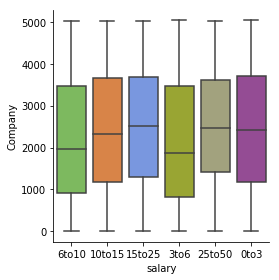

In [170]:
#PLotting blox plot shows that there is delay of 20-30 Mins in June July and Dec per flight as compared to less than 10 mins
#other months
#Further analysis of total flights increased or not during that month would show that delay was because of congestion in
#airport or  Bad weather or less staffing
#plt.figure(figsize=(5,4))
from matplotlib import pyplot as plt
pkmn_type_colors = ['#78C850',  # WE
                    '#F08030',  # NA
                    '#6890F0',  # ANZ
                    '#A8B820',  # ME
                    '#A8A878',  # LA
                    '#A040A0',  # SA
                    '#F8D030',  # CEE
                    '#E0C068',  # EA
                    '#EE99AC',  # SSA
                    '#C03028',  # SA
                   ]
               
sns.factorplot(x='salary',y='company_name_encoded',data=ds_input,palette=pkmn_type_colors,kind='box',showfliers = True)
plt.xlabel("salary")
plt.ylabel("Company")

plt.show();

In [171]:
m=ds_input[['salary','company_name_encoded']].groupby('salary')

m['company_name_encoded'].value_counts()

salary  company_name_encoded
0to3    4951                    41
        1153                    38
        1631                    23
        3616                    23
        437                     22
        2677                    21
        3719                    21
        4368                    20
        1456                    16
        320                     15
        1806                    15
        4369                    15
        192                     14
        837                     14
        975                     13
        2722                    13
        4774                    13
        2064                    12
        2199                    12
        3910                    12
        4893                    12
        1305                    11
        4880                    11
        1087                    10
        2031                    10
        2094                    10
        2217                    10
        4574              

In [172]:
 ds_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19801 entries, 0 to 19801
Data columns (total 7 columns):
experience              19801 non-null object
job_desig               19801 non-null object
job_type                4796 non-null object
key_skills              19801 non-null object
location                19801 non-null object
salary                  19801 non-null object
company_name_encoded    19801 non-null int64
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


In [173]:
ds_input["job_type"].fillna("Others",inplace = True)

In [174]:
# Job type 
ds_input["job_type"] = ds_input["job_type"].apply(lambda x: " ".join(x.lower() for x in x.split()))
ds_input["job_type"]= ds_input["job_type"].replace("analytic", "analytics")


In [175]:
ds_exp = ds_input["experience"].str.split("-",n=1,expand=True)
ds_exp[1]=ds_exp[1].str.replace("yrs",'')
ds_exp
ds_input["Exp_min"]= ds_exp[0].astype(str).astype(int)
ds_input["Exp_max"]= ds_exp[1].astype(str).astype(int)

ds_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19801 entries, 0 to 19801
Data columns (total 9 columns):
experience              19801 non-null object
job_desig               19801 non-null object
job_type                19801 non-null object
key_skills              19801 non-null object
location                19801 non-null object
salary                  19801 non-null object
company_name_encoded    19801 non-null int64
Exp_min                 19801 non-null int32
Exp_max                 19801 non-null int32
dtypes: int32(2), int64(1), object(6)
memory usage: 2.0+ MB


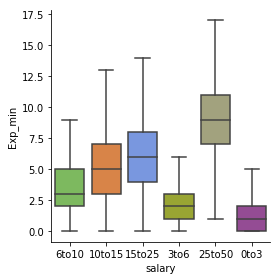

In [176]:
sns.factorplot(x='salary',y='Exp_min',data=ds_input,palette=pkmn_type_colors,kind='box',showfliers = False)
plt.xlabel("salary")
plt.ylabel("Exp_min")

plt.show();

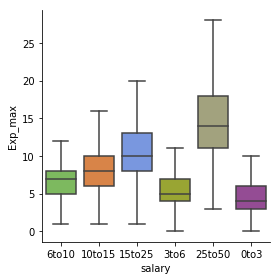

In [177]:
sns.factorplot(x='salary',y='Exp_max',data=ds_input,palette=pkmn_type_colors,kind='box',showfliers = False)
plt.xlabel("salary")
plt.ylabel("Exp_max")

plt.show();

 #def upd_exp(exp):
    exp = int(exp)
    if(exp <=3):
        exp=1
    elif (exp<= 5):
        exp=2
    elif(exp<= 10):
        exp=3
    elif(exp<= 15):
        exp=4
    elif(exp> 15):
        exp = 5
    return exp

ds_input["exp_range"]= ds_exp[1].apply(upd_exp)

### Data exploration

### 4. Feature Engineering  <a id='feature'>

In [178]:
ds_input.head()

,experience,job_desig,job_type,key_skills,location,salary,company_name_encoded,Exp_min,Exp_max
0,5-7 yrs,Senior Exploit and Vulnerability Researcher,others,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687,5,7
1,10-17 yrs,Head SCM,others,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458,10,17
2,5-9 yrs,Deputy Manager - Talent Management & Leadershi...,analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195,5,9
3,7-10 yrs,Associate Manager Data Engineering,analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313,7,10
4,1-3 yrs,TS- GSA- Senior Analyst,others,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305,1,3


In [179]:
# Convert Categorical to Numerical for default column
jobtype_dummies = pd.get_dummies(ds_input.job_type, prefix='jobtype')
#location_new_dummies = pd.get_dummies(ds_input.location_new, prefix='loc')
#exp_range_dummies = pd.get_dummies(ds_input.exp_range, prefix='exp_range')


In [180]:
ds_input = pd.concat([ds_input,jobtype_dummies], axis=1)
#ds_input = pd.concat([ds_input,location_new_dummies], axis=1)
#ds_input = pd.concat([ds_input,exp_range_dummies], axis=1)

In [181]:
# Merge job_desig+ job_type +key_skills
ds_input["combined"] = ds_input["job_desig"]+ ' ' +ds_input["job_type"]+ ' '+ds_input["key_skills"]
#ds_input = pd.concat([ds_input,location_new_dummies], axis=1)
#ds_input = pd.concat([ds_input,exp_range_dummies], axis=1)

In [182]:
ds_input.head()

,experience,job_desig,job_type,key_skills,location,salary,company_name_encoded,Exp_min,Exp_max,jobtype_analytics,jobtype_others,combined
0,5-7 yrs,Senior Exploit and Vulnerability Researcher,others,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687,5,7,0,1,Senior Exploit and Vulnerability Researcher ot...
1,10-17 yrs,Head SCM,others,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458,10,17,0,1,"Head SCM others ppc, logistics, inventory mana..."
2,5-9 yrs,Deputy Manager - Talent Management & Leadershi...,analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195,5,9,1,0,Deputy Manager - Talent Management & Leadershi...
3,7-10 yrs,Associate Manager Data Engineering,analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313,7,10,1,0,Associate Manager Data Engineering analytics S...
4,1-3 yrs,TS- GSA- Senior Analyst,others,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305,1,3,0,1,"TS- GSA- Senior Analyst others accounting, fin..."


In [183]:
df_train=ds_input.drop(['experience','job_desig','key_skills','company_name_encoded','location','job_type'],axis=1)
df_train["combined"] = df_train["combined"]+ ' ' +ds_input["location"]
df_train.head()
df_train.to_excel('df_train.xlsx')

In [184]:
#df= ds_input.drop(['experience','job_desig','job_type','key_skills','location','company_name_encoded','location_new','exp_range'],axis=1)
df= ds_input.drop(['experience','job_desig','key_skills','company_name_encoded','location','job_type','combined'],axis=1)

df.head()

,salary,Exp_min,Exp_max,jobtype_analytics,jobtype_others
0,6to10,5,7,0,1
1,10to15,10,17,0,1
2,15to25,5,9,1,0
3,10to15,7,10,1,0
4,3to6,1,3,0,1


In [185]:
# splitting the data into train and test with 70:30 ratio

Xd = df.drop('salary',axis = 1)
yd = df['salary']


### Test Data cleaning  <a id='feature'>

In [186]:
dst_input=pd.read_csv(r'Final_Test_Dataset.csv')

In [187]:
 dst_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 7 columns):
experience              6601 non-null object
job_description         5079 non-null object
job_desig               6601 non-null object
job_type                1637 non-null object
key_skills              6601 non-null object
location                6601 non-null object
company_name_encoded    6601 non-null int64
dtypes: int64(1), object(6)
memory usage: 361.1+ KB


In [188]:
#dropping job_desription as it seems to be covered by experience and skills.
dst_input.drop('job_description',inplace= True,axis=1)

In [189]:
#dropping 1 null key skills row.
dst_input.drop(ds_input[ds_input['key_skills'].isnull()].index.tolist(),inplace=True)

In [190]:
 dst_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6601 entries, 0 to 6600
Data columns (total 6 columns):
experience              6601 non-null object
job_desig               6601 non-null object
job_type                1637 non-null object
key_skills              6601 non-null object
location                6601 non-null object
company_name_encoded    6601 non-null int64
dtypes: int64(1), object(5)
memory usage: 361.0+ KB


In [191]:
dst_input["job_type"].fillna("Others",inplace = True)

In [192]:
# Job type 
dst_input["job_type"] = ds_input["job_type"].apply(lambda x: " ".join(x.lower() for x in x.split()))
dst_input["job_type"]= ds_input["job_type"].replace("analytic", "analytics")


In [193]:
dst_input["job_type"].fillna("others",inplace = True)

In [194]:
dst_exp = ds_input["experience"].str.split("-",n=1,expand=True)
dst_exp[1]=ds_exp[1].str.replace("yrs",'')
dst_exp

,0,1
0,5,7
1,10,17
2,5,9
3,7,10
4,1,3
5,5,10
6,13,15
7,6,10
8,1,3
9,2,6


In [195]:
dst_exp = dst_input["experience"].str.split("-",n=1,expand=True)
dst_exp[1]=dst_exp[1].str.replace("yrs",'')
dst_exp
dst_input["Exp_min"]= dst_exp[0].astype(str).astype(int)
dst_input["Exp_max"]= dst_exp[1].astype(str).astype(int)

In [196]:
# Convert Categorical to Numerical for default column
jobtype_dummies = pd.get_dummies(dst_input.job_type, prefix='jobtype')
#location_new_dummies = pd.get_dummies(dst_input.location_new, prefix='loc')
#exp_range_dummies = pd.get_dummies(dst_input.exp_range, prefix='exp_range')


In [197]:
dst_input = pd.concat([dst_input,jobtype_dummies], axis=1)
#dst_input = pd.concat([dst_input,location_new_dummies], axis=1)
#dst_input = pd.concat([dst_input,exp_range_dummies], axis=1)

In [198]:
# Merge job_desig+ job_type +key_skills
dst_input["combined"] = dst_input["job_desig"]+ ' ' +dst_input["job_type"]+ ' '+dst_input["key_skills"]


In [199]:
dst_input.head()

,experience,job_desig,job_type,key_skills,location,company_name_encoded,Exp_min,Exp_max,jobtype_analytics,jobtype_others,combined
0,7-12 yrs,IT Technology Senior Consultant/java/ J2ee/ Se...,others,"Java, J2Ee, Tomcat, JBoss, Weblogic, Oracle, E...",Bengaluru,2066,7,12,0,1,IT Technology Senior Consultant/java/ J2ee/ Se...
1,0-5 yrs,Medical Billing Process | International KPO | ...,others,"Medical Billing, Insurance Processing",Ahmedabad(Sola),2629,0,5,0,1,Medical Billing Process | International KPO | ...
2,3-6 yrs,Oracle Sales Cloud Functional Consultant,analytics,"Oracle Sales, Functional Consultancy, Troubles...",Bengaluru,2448,3,6,1,0,Oracle Sales Cloud Functional Consultant analy...
3,0-3 yrs,Looking For Freshers WHO WANT To Work WITH US,analytics,"offline, online, internet, part time, home bas...","Delhi NCR, Chennai, Hyderabad, Gurgaon, Luckno...",2711,0,3,1,0,Looking For Freshers WHO WANT To Work WITH US ...
4,0-5 yrs,Process Associate / Sr Process Associate / Tec...,others,"voice support, analytical skills, Process asso...",Hyderabad,40,0,5,0,1,Process Associate / Sr Process Associate / Tec...


In [200]:
dst_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6601 entries, 0 to 6600
Data columns (total 11 columns):
experience              6601 non-null object
job_desig               6601 non-null object
job_type                6601 non-null object
key_skills              6601 non-null object
location                6601 non-null object
company_name_encoded    6601 non-null int64
Exp_min                 6601 non-null int32
Exp_max                 6601 non-null int32
jobtype_analytics       6601 non-null uint8
jobtype_others          6601 non-null uint8
combined                6601 non-null object
dtypes: int32(2), int64(1), object(6), uint8(2)
memory usage: 477.0+ KB


In [201]:
df_test=dst_input.drop(['experience','job_desig','key_skills','company_name_encoded','location','job_type'],axis=1)
df_test["combined"] = df_test["combined"]+ ' ' +dst_input["location"]
df_test.head()
df_test.to_excel('df_test.xlsx')

In [202]:
#dft= dst_input.drop(['experience','job_desig','job_type','key_skills','location','company_name_encoded','location_new','exp_range'],axis=1)
dft= dst_input.drop(['experience','job_desig','key_skills','company_name_encoded','location','job_type','combined'],axis=1)

dft.head()

,Exp_min,Exp_max,jobtype_analytics,jobtype_others
0,7,12,0,1
1,0,5,0,1
2,3,6,1,0
3,0,3,1,0
4,0,5,0,1


In [203]:
#This is the test dataset where we are going to predict who will take term deposit.

xd_test=dft
xd_test

,Exp_min,Exp_max,jobtype_analytics,jobtype_others
0,7,12,0,1
1,0,5,0,1
2,3,6,1,0
3,0,3,1,0
4,0,5,0,1
5,4,6,0,1
6,10,20,1,0
7,0,2,0,1
8,6,8,0,1
9,0,5,0,1


### NLP

###  Lower case   <a id='erf'>

In [40]:
ds_input['combined'] = ds_input['combined'].apply(lambda x: " ".join(x.lower() for x in x.split()))
ds_input['combined'].head()

0    senior exploit and vulnerability researcher ot...
1    head scm others ppc, logistics, inventory mana...
2    deputy manager - talent management & leadershi...
3    associate manager data engineering analytics s...
4    ts- gsa- senior analyst others accounting, fin...
Name: combined, dtype: object

In [41]:
ds_input['location'] = ds_input['location'].apply(lambda x: " ".join(x.lower() for x in x.split()))
ds_input['location'].head()

0    delhi ncr(vikas puri)
1                  sonepat
2                delhi ncr
3                bengaluru
4                  gurgaon
Name: location, dtype: object

### Removing Punctuation  <a id='erf'>

In [42]:
ds_input['combined'] = ds_input['combined'].str.replace('[^\w\s]','')
ds_input['combined'].head()

0    senior exploit and vulnerability researcher ot...
1    head scm others ppc logistics inventory manage...
2    deputy manager  talent management  leadership ...
3    associate manager data engineering analytics s...
4    ts gsa senior analyst others accounting financ...
Name: combined, dtype: object

In [43]:
ds_input['location'] = ds_input['location'].str.replace('[^\w\s]','')
ds_input['location'].head()

0    delhi ncrvikas puri
1                sonepat
2              delhi ncr
3              bengaluru
4                gurgaon
Name: location, dtype: object

### Removal of Stop Words <a id='erf'>

In [44]:
import nltk.corpus
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
ds_input['combined'] = ds_input['combined'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
ds_input['combined'].head()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


0    senior exploit vulnerability researcher others...
1    head scm others ppc logistics inventory manage...
2    deputy manager talent management leadership de...
3    associate manager data engineering analytics s...
4    ts gsa senior analyst others accounting financ...
Name: combined, dtype: object

In [45]:
ds_input['location'] = ds_input['location'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
ds_input['location'].head()

0    delhi ncrvikas puri
1                sonepat
2              delhi ncr
3              bengaluru
4                gurgaon
Name: location, dtype: object

###  Common word removal <a id='erf'>

In [46]:
freq = pd.Series(' '.join(ds_input['combined']).split()).value_counts()[:10]
freq

others         15006
analytics      11089
data            7281
business        5339
analyst         5132
analysis        5040
management      5025
manager         4446
marketing       3892
development     2507
dtype: int64

In [47]:
freq = list(freq.index)
ds_input['combined'] = ds_input['combined'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
ds_input['combined'].head()

0    senior exploit vulnerability researcher team s...
1    head scm ppc logistics inventory supply chain ...
2    deputy talent leadership auto hr employee enga...
3    associate engineering sql javascript automatio...
4    ts gsa senior accounting finance cash flow fin...
Name: combined, dtype: object

In [48]:
freq = pd.Series(' '.join(ds_input['location']).split()).value_counts()[:10]
freq

bengaluru    5135
mumbai       3811
gurgaon      2654
delhi        2288
ncr          1664
pune         1576
hyderabad    1457
chennai      1359
noida        1096
kolkata       348
dtype: int64

In [49]:
freq = list(freq.index)
ds_input['location'] = ds_input['location'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
ds_input['location'].head()

0    ncrvikas puri
1          sonepat
2                 
3                 
4                 
Name: location, dtype: object

### Rare words removal <a id='erf'>

In [50]:
freq = pd.Series(' '.join(ds_input['combined']).split()).value_counts()[-10:]
freq

4d                 1
airseva            1
x86                1
lpar               1
learningmachine    1
asias              1
sarojini           1
dealership         1
maldives           1
port               1
dtype: int64

In [51]:
freq = list(freq.index)
ds_input['combined'] = ds_input['combined'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
ds_input['combined'].head()

0    senior exploit vulnerability researcher team s...
1    head scm ppc logistics inventory supply chain ...
2    deputy talent leadership auto hr employee enga...
3    associate engineering sql javascript automatio...
4    ts gsa senior accounting finance cash flow fin...
Name: combined, dtype: object

In [52]:
freq = pd.Series(' '.join(ds_input['location']).split()).value_counts()[-10:]
freq

ncrsector74a    1
ncrlaxmi        1
sierra          1
katihar         1
ncrsouth        1
rewari          1
punepaud        1
delhiad         1
punebavdhan1    1
uttar           1
dtype: int64

In [53]:
freq = list(freq.index)
ds_input['location'] = ds_input['location'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
ds_input['location'].head()

0    ncrvikas puri
1          sonepat
2                 
3                 
4                 
Name: location, dtype: object

### Spelling correction<a id='erf'>

In [54]:
from textblob import TextBlob
ds_input['combined'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    senior exploit vulnerability researcher team s...
1    head sum pp logistics inventor supply chain pr...
2    deputy talent leadership auto he employee enga...
3    associate engineering sal javascript automatic...
4    to gas senior accounting finance cash flow fin...
Name: combined, dtype: object

In [55]:
from textblob import TextBlob
ds_input['location'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    ncrvikas pure
1          sonepat
2                 
3                 
4                 
Name: location, dtype: object

### Stemming<a id='erf'>

In [56]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
ds_input['combined'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    senior exploit vulner research team skill comm...
1    head scm ppc logist inventori suppli chain procur
2    deputi talent leadership auto hr employe engag...
3    associ engin sql javascript autom python rubi ...
4    ts gsa senior account financ cash flow financi...
Name: combined, dtype: object

In [57]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
ds_input['location'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    ncrvika puri
1         sonepat
2                
3                
4                
Name: location, dtype: object

### Lemmatization<a id='erf'>

In [58]:
from textblob import Word
nltk.download('wordnet')
ds_input['combined'] = ds_input['combined'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
ds_input['combined'].head()

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


0    senior exploit vulnerability researcher team s...
1    head scm ppc logistics inventory supply chain ...
2    deputy talent leadership auto hr employee enga...
3    associate engineering sql javascript automatio...
4    t gsa senior accounting finance cash flow fina...
Name: combined, dtype: object

In [59]:
from textblob import Word
nltk.download('wordnet')
ds_input['location'] = ds_input['location'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
ds_input['location'].head()

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


0    ncrvikas puri
1          sonepat
2                 
3                 
4                 
Name: location, dtype: object

### All these pre-processing steps are essential and help us in reducing our vocabulary clutter so that the features produced in the end are more effective. <a id='erf'>

### TF-IDFTF-IDF<a id='erf'>

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=8000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(ds_input['combined'])

tfidf_train_vect_df = pd.DataFrame(
    (count, word) for word, count in zip(
    train_vect.toarray().tolist()[0],   
    tfidf.get_feature_names()))
tfidf_train_vect_df.columns = ['Word', 'Count']
tfidf_train_vect_df.sort_values('Count', ascending=False, inplace=True)


In [61]:
tfidf_train_vect_df.head(10)

,Word,Count
6754,skill,0.592154
2864,exploit,0.391569
7754,vulnerability,0.334356
6191,researcher,0.311053
6825,solving,0.268050
5764,problem,0.258761
1841,communication,0.217224
7238,team,0.205695
683,analytical,0.197525
6617,senior,0.141982


In [62]:
tfidf_loc = TfidfVectorizer(max_features=3000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect_loc = tfidf_loc.fit_transform(ds_input['location'])

In [63]:
dfs=pd.DataFrame(train_vect.toarray().tolist(),columns= tfidf.get_feature_names())
dfs_loc=pd.DataFrame(train_vect_loc.toarray().tolist(),columns= tfidf_loc.get_feature_names())

In [64]:
Xd.reset_index(drop=True,inplace=True)

In [65]:
dfs.reset_index(drop=True,inplace=True)

In [66]:
dfs_loc=dfs_loc[dfs_loc.columns[~dfs_loc.columns.isin(dfs.columns)]]
dfs_loc.reset_index(drop=True,inplace=True)

In [67]:
#dfs_jd.drop(dfs_jd[dfs_jd.columns.isin(dfs.columns)].index.tolist(),inplace=True)
#a= ~dfs_jd.columns.isin(dfs.columns)
#np.info(a)

#xd_test[xd_test.columns[~xd_test.columns.isin(Xd)]]

In [68]:
Xd = pd.concat([Xd,dfs,dfs_loc], axis=1)

In [69]:
duplicate_col=Xd.columns[Xd.columns.duplicated()]
duplicate_col
Xd.head()

,Exp_min,Exp_max,jobtype_analytics,jobtype_others,01,02,02nd,02yr,03,03months,...,vihar15,village,village1,wadi,warangal,west2,yamunanagar,yangon,york,zealand
0,5,7,0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,17,0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,9,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,10,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Test Data lower case  <a id='erf'>

In [70]:
dst_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6601 entries, 0 to 6600
Data columns (total 11 columns):
experience              6601 non-null object
job_desig               6601 non-null object
job_type                6601 non-null object
key_skills              6601 non-null object
location                6601 non-null object
company_name_encoded    6601 non-null int64
Exp_min                 6601 non-null int32
Exp_max                 6601 non-null int32
jobtype_analytics       6601 non-null uint8
jobtype_others          6601 non-null uint8
combined                6601 non-null object
dtypes: int32(2), int64(1), object(6), uint8(2)
memory usage: 477.0+ KB


In [71]:
dst_input['combined'] = dst_input['combined'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dst_input['location'] = dst_input['location'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dst_input['combined'].head()

0    it technology senior consultant/java/ j2ee/ se...
1    medical billing process | international kpo | ...
2    oracle sales cloud functional consultant analy...
3    looking for freshers who want to work with us ...
4    process associate / sr process associate / tec...
Name: combined, dtype: object

### Removing Punctuation  <a id='erf'>

In [72]:
dst_input['combined'] = dst_input['combined'].str.replace('[^\w\s]','')
dst_input['location'] = dst_input['location'].str.replace('[^\w\s]','')
dst_input['combined'].head()

0    it technology senior consultantjava j2ee sever...
1    medical billing process  international kpo  in...
2    oracle sales cloud functional consultant analy...
3    looking for freshers who want to work with us ...
4    process associate  sr process associate  tech ...
Name: combined, dtype: object

### Removal of Stop Words <a id='erf'>

In [73]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
dst_input['combined'] = dst_input['combined'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dst_input['location'] = dst_input['location'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

dst_input['combined'].head()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


0    technology senior consultantjava j2ee sever ap...
1    medical billing process international kpo insu...
2    oracle sales cloud functional consultant analy...
3    looking freshers want work us analytics offlin...
4    process associate sr process associate tech as...
Name: combined, dtype: object

###  Common word removal <a id='erf'>

In [74]:
freq = pd.Series(' '.join(dst_input['combined']).split()).value_counts()[:10]
freq

others        4950
analytics     3719
data          2350
business      1795
analyst       1759
management    1731
analysis      1688
manager       1414
marketing     1177
sales          890
dtype: int64

In [75]:
freq = list(freq.index)
dst_input['combined'] = dst_input['combined'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dst_input['combined'].head()

0    technology senior consultantjava j2ee sever ap...
1    medical billing process international kpo insu...
2    oracle cloud functional consultant oracle func...
3    looking freshers want work us offline online i...
4    process associate sr process associate tech as...
Name: combined, dtype: object

In [76]:
freq = pd.Series(' '.join(dst_input['location']).split()).value_counts()[:10]
freq

bengaluru    1661
mumbai       1291
gurgaon       900
delhi         809
ncr           606
pune          531
hyderabad     506
chennai       462
noida         346
kolkata       115
dtype: int64

In [77]:
freq = list(freq.index)
dst_input['location'] = dst_input['location'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dst_input['location'].head()

0                 
1    ahmedabadsola
2                 
3          lucknow
4                 
Name: location, dtype: object

### Rare words removal <a id='erf'>

In [78]:
freq = pd.Series(' '.join(dst_input['combined']).split()).value_counts()[-10:]
freq

bar                1
speciali           1
360                1
premiere           1
analystaccounts    1
loaniq             1
turbhe             1
archiving          1
mdg                1
eim                1
dtype: int64

In [79]:
freq = list(freq.index)
dst_input['combined'] = dst_input['combined'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dst_input['combined'].head()

0    technology senior consultantjava j2ee sever ap...
1    medical billing process international kpo insu...
2    oracle cloud functional consultant oracle func...
3    looking freshers want work us offline online i...
4    process associate sr process associate tech as...
Name: combined, dtype: object

In [80]:
freq = pd.Series(' '.join(dst_input['location']).split()).value_counts()[-10:]
freq

aligarh               1
uzbekistan            1
noidasector149        1
bengalurumadiwala1    1
majiwade              1
bagh                  1
delhinehru            1
bank                  1
chennaialwarpet       1
warangal              1
dtype: int64

In [81]:
freq = list(freq.index)
dst_input['location'] = dst_input['location'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dst_input['location'].head()

0                 
1    ahmedabadsola
2                 
3          lucknow
4                 
Name: location, dtype: object

### Spelling correction<a id='erf'>

In [82]:
from textblob import TextBlob
dst_input['combined'][:5].apply(lambda x: str(TextBlob(x).correct()))
dst_input['location'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                 
1    ahmedabadsola
2                 
3          lucknow
4                 
Name: location, dtype: object

### Stemming<a id='erf'>

In [83]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
dst_input['combined'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
dst_input['location'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                 
1    ahmedabadsola
2                 
3          lucknow
4                 
Name: location, dtype: object

### Lemmatization<a id='erf'>

In [84]:
from textblob import Word
nltk.download('wordnet')
dst_input['combined'] = dst_input['combined'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dst_input['location'] = dst_input['location'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

dst_input['combined'].head()

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


0    technology senior consultantjava j2ee sever ap...
1    medical billing process international kpo insu...
2    oracle cloud functional consultant oracle func...
3    looking fresher want work u offline online int...
4    process associate sr process associate tech as...
Name: combined, dtype: object

### All these pre-processing steps are essential and help us in reducing our vocabulary clutter so that the features produced in the end are more effective. <a id='erf'>

### TF-IDFTF-IDF<a id='erf'>

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
#stop_words= 'english',ngram_range=(1,1))
test_vect = tfidf.transform(dst_input['combined'])
tfidf_test_vect_df = pd.DataFrame(
    (count, word) for word, count in zip(
    test_vect.toarray().tolist()[0],   
    tfidf.get_feature_names()))
tfidf_test_vect_df.columns = ['Word', 'Count']
tfidf_test_vect_df.sort_values('Count', ascending=False, inplace=True)


In [86]:
tfidf_test_vect_df.head(10)

,Word,Count
4002,j2ee,0.456381
7815,weblogic,0.360107
4080,jboss,0.316961
7378,tomcat,0.304766
2652,elastic,0.295386
5631,pl,0.288642
1994,core,0.214850
6573,search,0.210168
5426,oracle,0.199170
3533,hr,0.193516


In [87]:
test_vect_loc = tfidf_loc.transform(dst_input['location'])


In [88]:
dfst=pd.DataFrame(test_vect.toarray().tolist(),columns= tfidf.get_feature_names())

In [89]:
dfst_loc=pd.DataFrame(test_vect_loc.toarray().tolist(),columns= tfidf_loc.get_feature_names())

In [90]:
dfst_loc=dfst_loc[dfst_loc.columns[~dfst_loc.columns.isin(dfst.columns)]]

In [91]:
xd_test.reset_index(drop=True,inplace=True)
dfst.reset_index(drop=True,inplace=True)
dfst_loc.reset_index(drop=True,inplace=True)

In [92]:
xd_test = pd.concat([xd_test,dfst,dfst_loc], axis=1)

In [93]:
duplicate_col=xd_test.columns[xd_test.columns.duplicated()]
duplicate_col
#xd_test.head()

Index([], dtype='object')

### Scaling dataset   <a id='pcalr'>

In [94]:
# Fitting the PCA on the data

from sklearn.preprocessing import MinMaxScaler
scld=MinMaxScaler(feature_range=(0,1))
Xd_arr_scld =scld.fit_transform(Xd)
xd_arr_scld =scld.fit_transform(xd_test)
Xd_scld=pd.DataFrame(Xd_arr_scld,columns=Xd.columns)
xd_test_scld=pd.DataFrame(xd_arr_scld,columns=xd_test.columns)


#pca = PCA()
#pca.fit(Xd)

In [95]:
Xd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19801 entries, 0 to 19800
Columns: 8909 entries, Exp_min to zealand
dtypes: float64(8905), int32(2), uint8(2)
memory usage: 1.3 GB


In [96]:
xd_test_scld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Columns: 8909 entries, Exp_min to zealand
dtypes: float64(8909)
memory usage: 448.7 MB


In [97]:
#Xd_scld.describe()

### Applying PCA to dataset   <a id='pcalr'>

In [98]:
# Fitting the PCA on the data

#from sklearn.decomposition import PCA
#pca = PCA()
#pca.fit(Xd)

In [99]:
# Minimum number of components for which the variance is 90% is 15

#pca.explained_variance_ratio_[:1].sum()

In [100]:
# consider first 15 components as they are explaining the 90% of variation in the data

#x_pca = PCA(n_components=1)
#Xd_pca = x_pca.fit_transform(Xd)
#xd_test_pca = x_pca.fit_transform(xd_test)

### 5 Decision Tree <a id='rf'>

This shows all the hyperparameters of Decision Tree model

### 5.1 Training Decision Tree Model  <a id='tdt'>

In [101]:
# Importing the packages for Decision Tree Classifier

from sklearn import tree
my_tree_one = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
my_tree_one

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [102]:
# Fit the decision tree model on your features and label

my_tree_one = my_tree_one.fit(Xd_scld, yd)

In [103]:
# The feature_importances_ attribute make it simple to interpret the significance of the predictors you include

list(zip(Xd.columns,my_tree_one.feature_importances_))

[('Exp_min', 0.1916223626020047),
 ('Exp_max', 0.7798778409786329),
 ('jobtype_analytics', 0.0),
 ('jobtype_others', 0.0),
 ('01', 0.0),
 ('02', 0.0),
 ('02nd', 0.0),
 ('02yr', 0.0),
 ('03', 0.0),
 ('03months', 0.0),
 ('03novsat', 0.0),
 ('03rd', 0.0),
 ('04', 0.0),
 ('05', 0.0),
 ('06', 0.0),
 ('08', 0.0),
 ('09', 0.0),
 ('09oct18', 0.0),
 ('10', 0.0),
 ('100', 0.0),
 ('1012', 0.0),
 ('1012th', 0.0),
 ('1014', 0.0),
 ('1015', 0.0),
 ('103', 0.0),
 ('1040', 0.0),
 ('105', 0.0),
 ('1065', 0.0),
 ('10g', 0.0),
 ('10k', 0.0),
 ('10lpa', 0.0),
 ('10th', 0.0),
 ('11', 0.0),
 ('1120', 0.0),
 ('11am', 0.0),
 ('11g', 0.0),
 ('11pm', 0.0),
 ('11th', 0.0),
 ('12', 0.0),
 ('123', 0.0),
 ('127', 0.0),
 ('12am', 0.0),
 ('12lpa', 0.0),
 ('12th', 0.0),
 ('12yrs_', 0.0),
 ('13', 0.0),
 ('1318', 0.0),
 ('13485', 0.0),
 ('13th', 0.0),
 ('13yrs', 0.0),
 ('14', 0.0),
 ('1418', 0.0),
 ('142', 0.0),
 ('144', 0.0),
 ('14l', 0.0),
 ('14oct18sun', 0.0),
 ('15', 0.0),
 ('1520', 0.0),
 ('15k', 0.0),
 ('15k40kno'

In [104]:
# The accuracy of the model

print(my_tree_one.score(Xd_scld, yd))

0.38296045654259886


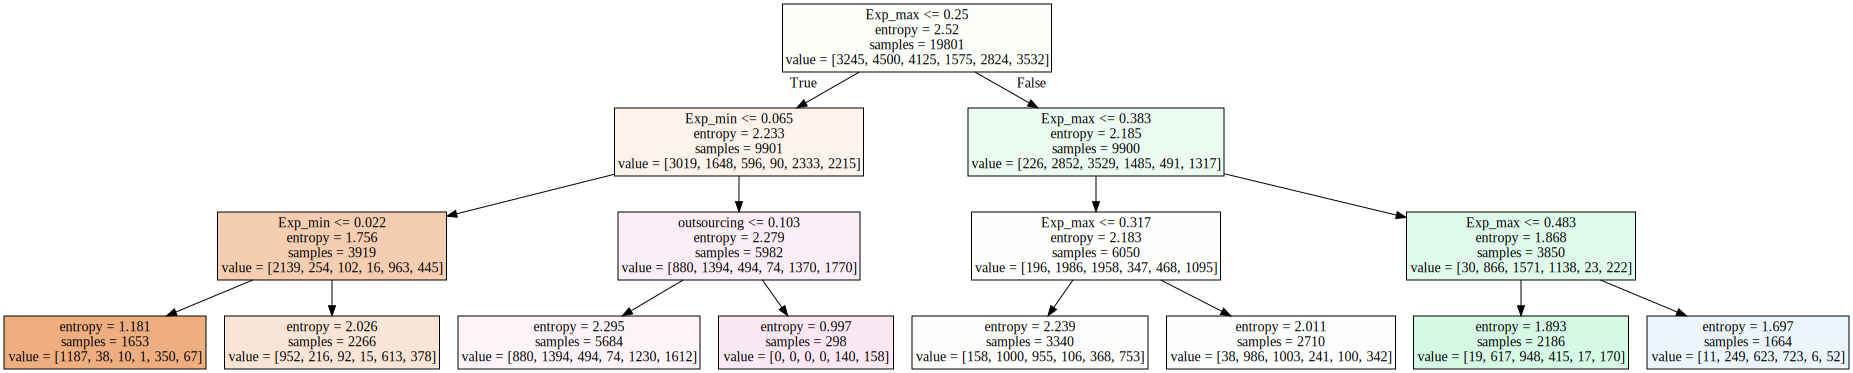

In [105]:
# Visualize the decision tree graph

with open('tree.dot','w') as dotfile:
    tree.export_graphviz(my_tree_one, out_file=dotfile, feature_names=Xd.columns, filled=True)
    dotfile.close()
    
# You may have to install graphviz package using 
# conda install graphviz
# conda install python-graphviz

from graphviz import Source

with open('tree.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot   

### 5.2 Predictions from Decision Tree Model   <a id='pdt'>

In [106]:
# Predictions from Decision Tree Model

yd_pred = my_tree_one.predict(xd_test_scld)

In [107]:
sal_pred = pd.DataFrame(yd_pred)

In [108]:
sal_pred.to_excel('sal_test_reslt.xlsx')

### 5.3 Evaluating the Decision Tree Model  <a id='edt'>

### 5.4. Fine tuning Hyper parameters  <a id = 'appendix'>

** Grid Search **

Grid-searching is the process of scanning the data to configure optimal parameters for a given model.  <br>
Let's apply Grid Search on a Decision Tree Model. It has many parameters like tree depth, criterion... etc. We will build different models with different combinations of these parameters and come up with the best model. 


In [109]:
# Different parameters we want to test

max_depth = [5,10,15] 
criterion = ['gini', 'entropy']

In [110]:
# Importing GridSearch

from sklearn.grid_search import GridSearchCV


C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [111]:
# Building the model

my_tree_three = tree.DecisionTreeClassifier()

# Cross-validation tells how well a model performs on a dataset using multiple samples of train data
#grid = GridSearchCV(estimator = my_tree_three, cv=3, 
#                   param_grid = dict(max_depth = max_depth, criterion = criterion))

In [112]:
#grid.fit(Xd,yd)

In [113]:
# Best accuracy score

#grid.best_score_

In [114]:
# Best parameters for the model

#grid.best_params_

In [115]:
# Building the model based on new parameters

my_tree_three = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, random_state=42)

In [116]:
my_tree_three.fit(Xd_scld,yd)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [117]:
# Accuracy Score for new model

my_tree_three.score(Xd_scld,yd)

0.4657845563355386

**Observation: **Our accuracy score improve from 0.89 to 0.89.47 

In [118]:
# Predictions from Decision Tree Model

yd_pred = my_tree_three.predict(xd_test_scld)

In [119]:
sal_pred = pd.DataFrame(yd_pred)

In [120]:
sal_pred.to_excel('sal_test_reslt_DT_Hyper.xlsx')

### 6. Random Forest  <a id='rf'>

### 6.1 Training Random Forest Model  <a id='trf'>

In [121]:
#predict_probabilities_DT = my_tree_three.predict_proba(xd_test)
# Building and fitting Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth = 10, n_estimators = 100, random_state = 1)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [122]:
# Fitting the model on Train Data

my_forest = forest.fit(Xd_scld, yd)

In [123]:
# Print the accuracy score of the fitted random forest

print(my_forest.score(Xd_scld, yd))

0.4233119539417201


 ### 6.2 Predictions from Random Forest Model   <a id='prf'>

In [124]:
# Making predictions

yr_pred = my_forest.predict(xd_test_scld)

In [125]:
sal_pred = pd.DataFrame(yr_pred)

In [126]:
sal_pred.to_excel('sal_test_reslt_RF.xlsx')

### 6.3 Evaluating the Random Forest Model   <a id='erf'>

**Randomized Search**

Using Randomized Search, we can define a grid of hyperparameters and randomly sample from the grid to get the best combination of values. <br>
Lets apply Randomized search on Random Forest model. This model has plenty of parameters like number of trees, depth of trees...etc. We will evaluate models with different parameters and come up with the best model.

In [127]:
# Different parameters we want to test

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [128]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [129]:
# Importing RandomizedSearchCV

from sklearn.grid_search import RandomizedSearchCV

In [130]:
forest_two = RandomForestClassifier()

# Fitting 3 folds for each of 100 candidates, totalling 300 fits
rf_random = RandomizedSearchCV(estimator = forest_two, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42,n_jobs=4)

In [131]:
#rf_random.fit(Xd,yd)

In [132]:
#rf_random.best_params_

A Random Forest model built with this hyperparameters will provide best accuracy

In [133]:
# Building and fitting Random Forest after tuning 

from sklearn.ensemble import RandomForestClassifier

forest_two = RandomForestClassifier(min_samples_split=2,min_samples_leaf=4,max_features='sqrt',max_depth = 30, n_estimators = 436, random_state = 1,bootstrap= True)
forest_two

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=436, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

### 6.1 Training Random Forest Model after tuning <a id='trf'>

In [134]:
# Fitting the model on Train Data

my_forest_two = forest_two.fit(Xd_scld, yd)

In [135]:
# Print the accuracy score of the fitted random forest

print(my_forest_two.score(Xd_scld, yd))

0.47861219130346955


 ### 6.2 Predictions from Random Forest Model   <a id='prf'>

**Observation: ** The original Random forest algorithm gave 0.90 accuracy whereas after Randomized Grid Search we have only got 0.82. This is the best random combination of parameters the algorithm has choosen which produced the highest accuracy.

 ### 6.2 Predictions from Random Forest Model after fine tuning of Hyperparameters  <a id='prf'>

In [136]:
# Making predictions

yrf_pred = my_forest_two.predict(xd_test)

In [137]:
sal_pred = pd.DataFrame(yrf_pred)

In [138]:
sal_pred.to_excel('sal_test_reslt_RFHyper.xlsx')

### The End

### XGBoost<a id='erf'>

In [139]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost.sklearn import XGBClassifier
from datetime import datetime

In [140]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.05, n_estimators=400, objective='multi:softprob',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

#skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=4, cv=3, verbose=3, random_state=42 )
random_search

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(Xd, yd)
timer(start_time) # timing ends here for "start_time" variable

print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)

In [141]:
xgboost_one = XGBClassifier( booster='dart', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=2, learning_rate=0.1,
       max_depth=5, n_estimators=400,sample_type ='uniform',
       n_jobs=4, nthread=4, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1,
       silent=True)

In [142]:
my_xgboost_one = xgboost_one.fit(Xd_scld,yd)

In [143]:
# Print the accuracy score of the fitted random forest

print(my_xgboost_one.score(Xd_scld, yd))

C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.5786576435533559


 ### 6.2 Predictions from XGBoost Model   <a id='prf'>

In [144]:
# Making predictions

#xd_test = xd_test[Xd.columns]

yrg_pred = my_xgboost_one.predict(xd_test_scld)

C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [145]:
sal_pred = pd.DataFrame(yrg_pred)

In [146]:
sal_pred.to_excel('sal_test_reslt_xgHyper.xlsx')

### 6. Building the Naive Bayes Model   <a id='nb'>

In [147]:
# Train Naive Bayes Classifier
# Fast (One pass)
# Not affected by sparse data, so most of the 6296 words dont occur in a single observation
from sklearn import naive_bayes
clf = naive_bayes.MultinomialNB()

### 7. Fitting the model   <a id='fitting'>

In [148]:
model=clf.fit(Xd_scld,yd)

### 8. Predictions from the model   <a id='pred'>

In [149]:
# Print the accuracy score of the fitted random forest

print(model.score(Xd_scld, yd))

0.5367910711580223


In [150]:
ynb_pred = model.predict(xd_test)

In [151]:
sal_pred = pd.DataFrame(ynb_pred)

In [152]:
sal_pred.to_excel('sal_test_reslt_Naive.xlsx')